In [1]:
# ** Problem statement **:
## A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. The product being sold is a term deposit (Fixed Deposit).

In [2]:
# ** Dataset Description **:

## Input variables (bank client data):
### 1 - age (numeric)
### 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
### 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
### 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
### 5 - default: has credit in default? (categorical: 'no','yes','unknown')
### 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
### 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### # related with the last contact of the current campaign:
### 8 - contact: contact communication type (categorical: 'cellular','telephone')
### 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
### 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
### 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Other attributes:
### 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
### 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
### 14 - previous: number of contacts performed before this campaign and for this client (numeric)
### 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

## Social and economic context attributes
### 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
### 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
### 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
### 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
### 20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
### 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# Importing the necessary libraries

In [4]:
import numpy as np
import sklearn
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Loading the training and testing dataset

In [6]:
train_data = pd.read_csv('train.csv', sep = ',')

test_data = pd.read_csv('test.csv', sep = ',')

In [7]:
## We need to check if there are any data types other than integer type in the 'age' column of training and the testing data.

In [8]:
train_data.age.unique(), test_data.age.unique() 

(array([56, 57, 37, 45, 41, 24, 25, 29, 35, 54, 46, 50, 39, 55, 59, 49, 34,
        52, 58, 32, 38, 44, 42, 60, 53, 47, 48, 33, 51, 43, 36, 40, 31, 30,
        27, 26, 22, 28, 20, 23, 21, 61, 19, 70, 66, 67, 73, 18, 88, 95, 77,
        63, 68, 80, 62, 65, 72, 82, 64, 71, 69, 75, 78, 85, 81, 83, 79, 74,
        76, 17, 87, 91, 86, 98, 94, 84, 92, 89]),
 array([40, 59, 41, 25, 57, 35, 30, 55, 37, 54, 45, 51, 42, 56, 50, 31, 39,
        49, 33, 52, 53, 38, 43, 28, 34, 32, 36, 27, 47, 29, 46, 48, 44, 23,
        24, 26, 60, 58, 20, 22, 21, 18, 61, 76, 88, 68, 75, 73, 69, 70, 67,
        19, 64, 85, 62, 79, 83, 66, 71, 63, 81, 65, 17, 74, 72, 80, 78, 92,
        84, 77]))

In [9]:
## Similarly we need to check if there are any datatypes which are not useful in all other columns of the training and the testing data

In [10]:
train_data.job.unique(), test_data.job.unique()

(array(['housemaid', 'services', 'blue-collar', 'technician', 'retired',
        'management', 'self-employed', 'admin.', 'unknown', 'entrepreneur',
        'unemployed', 'student'], dtype=object),
 array(['admin.', 'blue-collar', 'services', 'housemaid', 'unemployed',
        'technician', 'unknown', 'management', 'entrepreneur',
        'self-employed', 'retired', 'student'], dtype=object))

In [11]:
train_data.marital.unique(), test_data.marital.unique()

(array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 array(['married', 'single', 'divorced', 'unknown'], dtype=object))

In [12]:
train_data.education.unique(), test_data.education.unique()

(array(['basic.4y', 'high.school', 'basic.9y', 'unknown',
        'professional.course', 'basic.6y', 'university.degree',
        'illiterate'], dtype=object),
 array(['basic.6y', 'professional.course', 'unknown', 'high.school',
        'basic.4y', 'university.degree', 'basic.9y', 'illiterate'],
       dtype=object))

In [13]:
train_data.default.unique(), test_data.default.unique()

(array(['no', 'unknown', 'yes'], dtype=object),
 array(['no', 'unknown'], dtype=object))

In [14]:
train_data.housing.unique(), test_data.housing.unique()

(array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'yes', 'unknown'], dtype=object))

In [15]:
train_data.loan.unique(), test_data.loan.unique()

(array(['no', 'yes', 'unknown'], dtype=object),
 array(['no', 'unknown', 'yes'], dtype=object))

In [16]:
train_data.contact.unique(), test_data.contact.unique()

(array(['telephone', 'cellular'], dtype=object),
 array(['telephone', 'cellular'], dtype=object))

In [17]:
train_data.campaign.unique(), test_data.campaign.unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 14, 22,
        25, 16, 17, 15, 23, 56, 39, 42, 28, 26, 27, 32, 21, 24, 20, 29, 31,
        30, 35, 41, 40, 33, 34, 43]),
 array([ 1,  2,  3,  4,  5,  6,  7,  9, 23, 13, 10,  8, 14, 15, 17, 11, 20,
        35, 22, 12, 16, 18, 25, 21, 24, 31, 29, 28, 37, 27, 19, 33, 40, 30]))

In [18]:
train_data.pdays.unique(), test_data.pdays.unique()

(array([999,   6,   4,   3,   5,   0,   1,  10,   7,  11,   2,   9,   8,
         12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
         20]),
 array([999,   1,   5,   6,   4,   3,   8,   9,   2,   0,  11,  12,  10,
          7,  13,  14,  15,  16,  17,  18,  19]))

In [19]:
train_data.poutcome.unique(), test_data.poutcome.unique()

(array(['nonexistent', 'failure', 'success'], dtype=object),
 array(['nonexistent', 'failure', 'success'], dtype=object))

In [20]:
train_data.y.unique()

array(['no', 'yes'], dtype=object)

In [21]:
train_data.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
test_data.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,55,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,...,293,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [23]:
train_data.shape, test_data.shape

((32978, 22), (8210, 21))

In [24]:
# ** Feature Engineering **:

# We can exclude few variables from the training and the testing data as they hardly/do not affect the result.

In [25]:
train_data.drop(['duration', 'day_of_week', 'default', 'contact', 'pdays',],axis=1,inplace=True)

test_data.drop(['duration', 'day_of_week', 'default', 'contact', 'pdays',],axis=1,inplace=True)

In [26]:
train_data.head()

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,yes,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
test_data.head()

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [28]:
# We need to check if there are any missing values in all the columns of the training and testing data. If there are any missing values we can delete them.

In [29]:
train_data.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [30]:
test_data.isnull().sum()

id                0
age               0
job               0
marital           0
education         0
housing           0
loan              0
month             0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [31]:
## We haven't found any missing values, hence we can proceed.

In [32]:
train_data

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,yes,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32973,41182,29,unemployed,single,basic.4y,yes,no,nov,1,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
32974,41183,73,retired,married,professional.course,yes,no,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
32975,41185,56,retired,married,university.degree,yes,no,nov,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
32976,41186,44,technician,married,professional.course,no,no,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [33]:
test_data

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,no,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,yes,no,may,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8205,41172,31,admin.,single,university.degree,yes,no,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6
8206,41174,62,retired,married,university.degree,yes,no,nov,1,6,success,-1.1,94.767,-50.8,1.031,4963.6
8207,41177,57,retired,married,professional.course,yes,no,nov,6,0,nonexistent,-1.1,94.767,-50.8,1.031,4963.6
8208,41181,37,admin.,married,university.degree,yes,no,nov,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [34]:
# ** Exploratory Data Analysis **:
## Visualising data*:

Text(0.5, 0, 'Subscribed Term Deposit (y)')

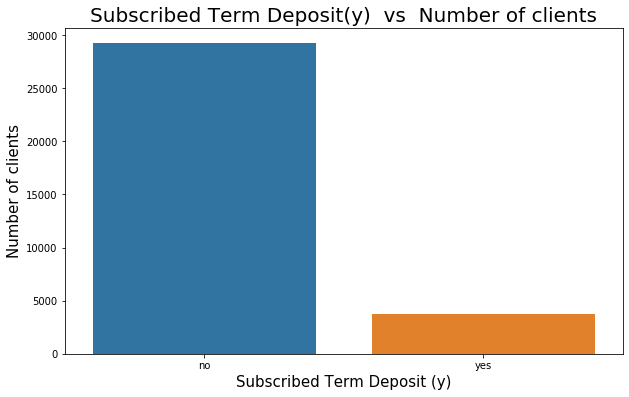

In [35]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='y', data=train_data)
ax.set_title('Subscribed Term Deposit(y)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Subscribed Term Deposit (y)', fontsize = 15)

In [36]:
## From the above graph we can see that very few clients are subscribing for the term deposit.
## Better marketing strategies have to be implemented in order to attract more clients for subscribing the term deposit.

Text(0, 0.5, 'Number of clients')

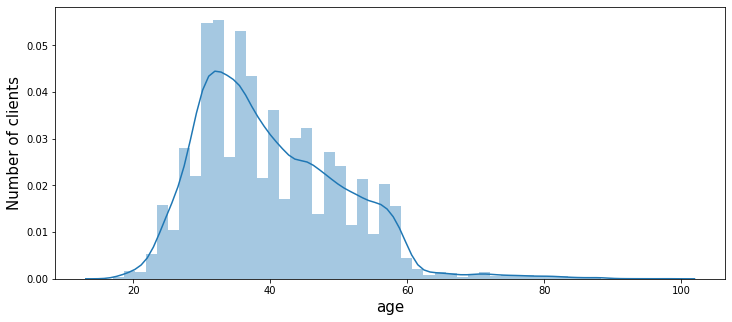

In [37]:
plt.figure(figsize=(12,5))
ax = sns.distplot(a=train_data['age'])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('Number of clients', fontsize=15)

In [38]:
## From the above graph, we can say that most of the clients who have subscribed for term deposit are of ages 30-40.

Text(0.5, 0, 'Number of clients')

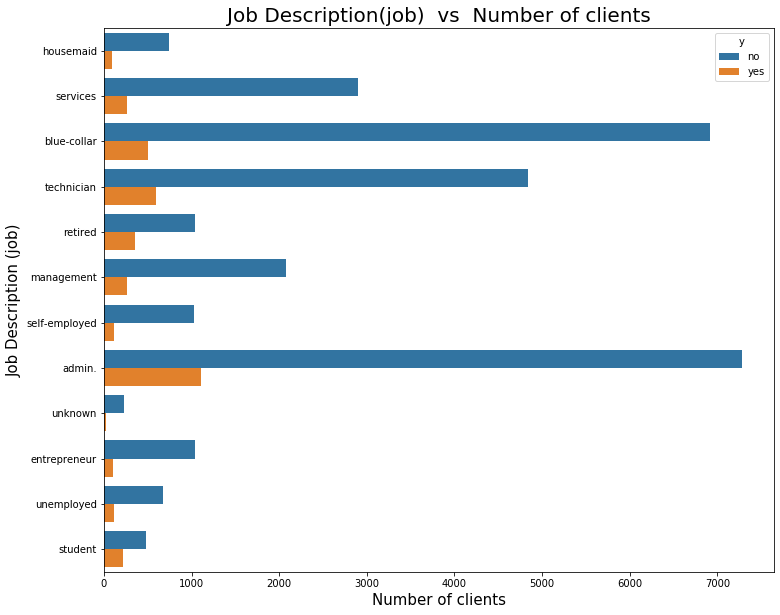

In [39]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y='job', data=train_data, hue='y')
ax.set_title('Job Description(job)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Job Description (job)', fontsize = 15)
ax.set_xlabel('Number of clients', fontsize = 15)

In [40]:
## It is clear from the graph that the majority of clients who have subscribed for term deposit are admins according to the training data.

Text(0.5, 0, 'Marital status (marital)')

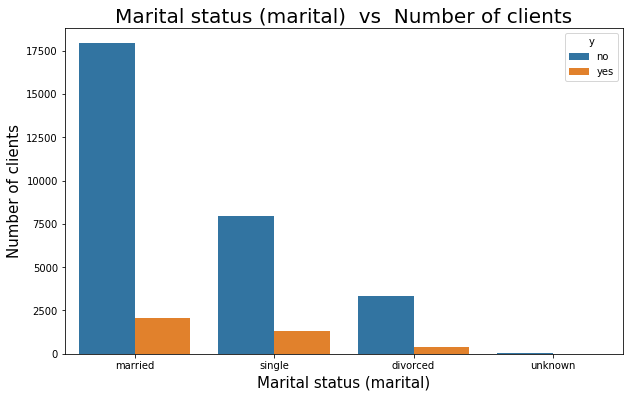

In [41]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='marital', data=train_data, hue='y')
ax.set_title('Marital status (marital)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Marital status (marital)', fontsize = 15)

In [42]:
## From the above graph, we can say that many clients whose marital status is married haven't subscribed for term deposit according to the training data.

Text(0.5, 0, 'Number of clients')

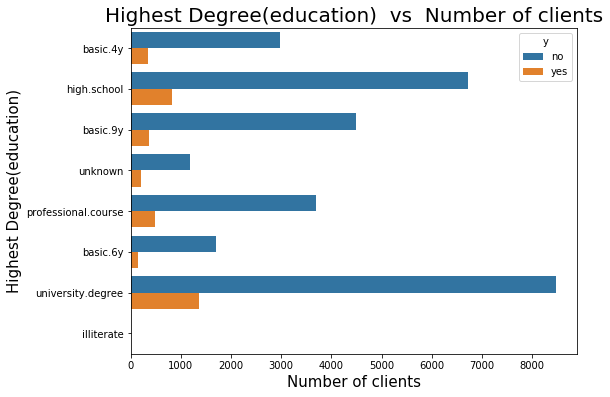

In [43]:
plt.figure(figsize=(8,6))
ax = sns.countplot(y='education', data=train_data, hue='y')
ax.set_title('Highest Degree(education)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Highest Degree(education)', fontsize = 15)
ax.set_xlabel('Number of clients', fontsize = 15)

In [44]:
## From the above graph, we can say that most of the clients who have subscribed for term deposit have university degree as the highest degree of education according to the training data.

Text(0.5, 0, 'Housing loan(housing)')

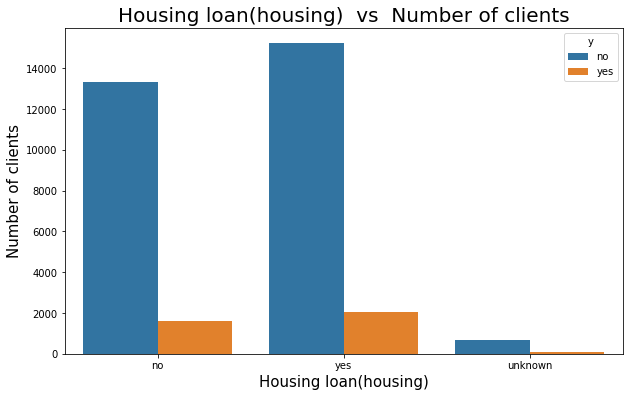

In [45]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='housing', data=train_data, hue='y')
ax.set_title('Housing loan(housing)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Housing loan(housing)', fontsize = 15)

Text(0.5, 0, 'Personal Loan(loan)')

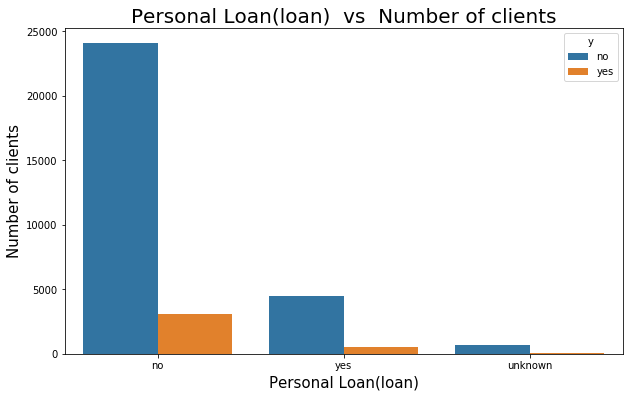

In [46]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='loan', data=train_data, hue='y')
ax.set_title('Personal Loan(loan)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Personal Loan(loan)', fontsize = 15)

In [47]:
## From the above graph, we can say that most of the clients who have subscribed for term deposit do not have any personal loans according to the training data.

Text(0, 0.5, 'Months')

<Figure size 720x432 with 0 Axes>

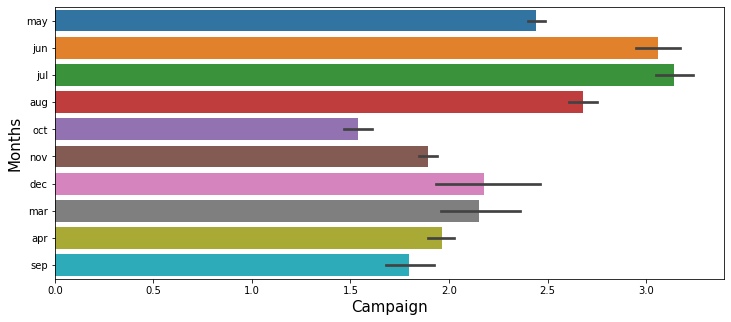

In [48]:
plt.figure(figsize=(10,6))
plt.figure(figsize=(12,5))
ax = sns.barplot(x='campaign',y='month', data=train_data)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Months', fontsize=15)

In [49]:
## We can say that campaign went on for most part of the year.

Text(0.5, 0, 'Number of clients')

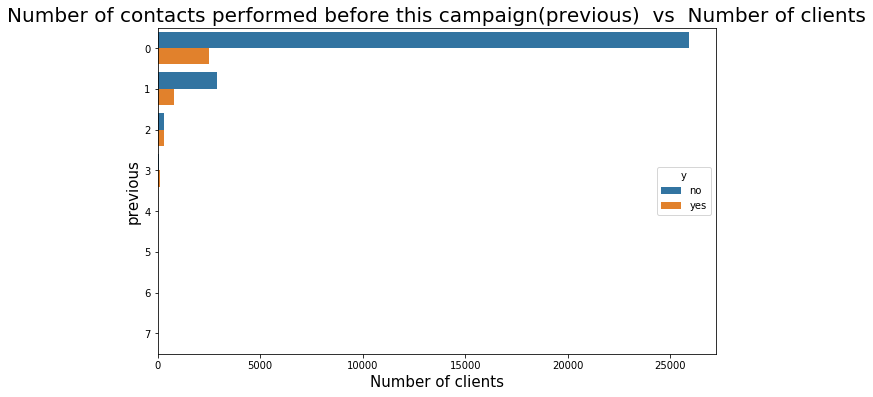

In [50]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='previous', data=train_data, hue='y')
ax.set_title('Number of contacts performed before this campaign(previous)  vs  Number of clients', fontsize=20)
ax.set_ylabel('previous', fontsize = 15)
ax.set_xlabel('Number of clients', fontsize = 15)

In [51]:
## From the above graph, most of the clients who have subscribed fot term deposit have made 0 contacts before this campaign according to the training data.
## More number of contacts 

Text(0.5, 0, 'Outcome of previous marketing campaign(poutcome)')

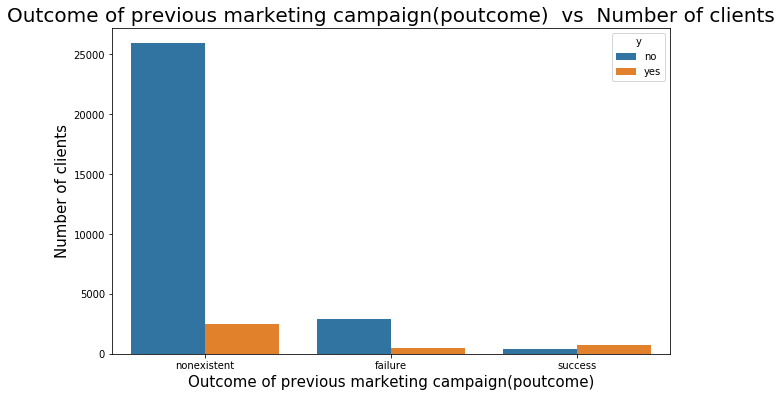

In [52]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='poutcome', data=train_data, hue='y')
ax.set_title('Outcome of previous marketing campaign(poutcome)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Number of clients', fontsize = 15)
ax.set_xlabel('Outcome of previous marketing campaign(poutcome)', fontsize = 15)

Text(0.5, 0, 'Number of clients')

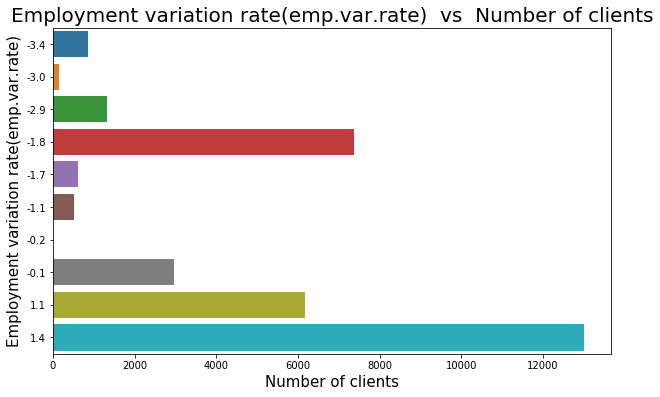

In [53]:
plt.figure(figsize=(10,6))
ax = sns.countplot(y='emp.var.rate', data=train_data)
ax.set_title('Employment variation rate(emp.var.rate)  vs  Number of clients', fontsize=20)
ax.set_ylabel('Employment variation rate(emp.var.rate)', fontsize = 15)
ax.set_xlabel('Number of clients', fontsize = 15)

In [54]:
# ** Data Pre-processing **:

In [55]:
## We ned to replace all the features with numerical values. First we replace 'no' with 0 and 'yes' with 1 in the 'y' column of training and the testing data.

In [56]:
train_data['y'].replace(['no'],0,inplace=True)
train_data['y'].replace(['yes'],1,inplace=True)

In [57]:
# Sklearn provides a tool for encoding the levels of a categorical feature into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1. Using LabelEncoder we change the categorical features into numeric values.

In [58]:
le = preprocessing.LabelEncoder()

In [59]:
train_data.job = le.fit_transform(train_data.job)
train_data.marital = le.fit_transform(train_data.marital)
train_data.education = le.fit_transform(train_data.education)
train_data.housing = le.fit_transform(train_data.housing)
train_data.loan = le.fit_transform(train_data.loan)
train_data.poutcome = le.fit_transform(train_data.poutcome)
train_data.month = le.fit_transform(train_data.month)

test_data.job = le.fit_transform(test_data.job)
test_data.marital = le.fit_transform(test_data.marital)
test_data.education = le.fit_transform(test_data.education)
test_data.housing = le.fit_transform(test_data.housing)
test_data.loan = le.fit_transform(test_data.loan)
test_data.poutcome = le.fit_transform(test_data.poutcome)
test_data.month = le.fit_transform(test_data.month)

In [60]:
train_data

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,3,1,0,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,1,57,7,1,3,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,2,37,7,1,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,4,56,7,1,3,0,2,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,5,45,7,1,2,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32973,41182,29,10,2,0,2,0,7,1,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
32974,41183,73,5,1,5,2,0,7,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
32975,41185,56,5,1,6,2,0,7,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
32976,41186,44,9,1,5,0,0,7,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [61]:
test_data

,id,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,0,1,1,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,6,59,0,1,5,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,10,41,1,1,7,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,11,25,7,2,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,13,57,3,0,0,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8205,41172,31,0,2,6,2,0,7,1,0,1,-1.1,94.767,-50.8,1.031,4963.6
8206,41174,62,5,1,6,2,0,7,1,6,2,-1.1,94.767,-50.8,1.031,4963.6
8207,41177,57,5,1,5,2,0,7,6,0,1,-1.1,94.767,-50.8,1.031,4963.6
8208,41181,37,0,1,6,2,0,7,1,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [62]:
train_data.shape , test_data.shape

((32978, 17), (8210, 16))

In [63]:
## We do not need the columns 'id' and 'y' in the training data.

In [64]:
x_train = train_data.iloc[:,1:16]
x_train[0:10]

,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,56,7,1,3,0,2,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,45,7,1,2,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
5,41,1,1,7,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,24,9,2,5,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
7,25,7,2,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,29,1,2,3,0,2,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,35,1,1,1,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0


In [65]:
## The column 'y' is chosen as the output.

In [66]:
y_train = train_data.iloc[:,16]
y_train[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [67]:
## We do not need the column 'id' in the testing data.

In [68]:
x_test = test_data.iloc[:,1:16]
x_test[0:10]

,age,job,marital,education,housing,loan,month,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,0,1,1,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,59,0,1,5,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,41,1,1,7,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,25,7,2,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,57,3,0,0,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
5,35,1,1,1,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
6,30,10,1,3,0,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
7,55,1,1,0,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
8,37,0,1,3,2,0,6,1,0,1,1.1,93.994,-36.4,4.857,5191.0
9,54,9,2,6,0,0,6,2,0,1,1.1,93.994,-36.4,4.857,5191.0


In [69]:
x_train.shape , y_train.shape , x_test.shape

((32978, 15), (32978,), (8210, 15))

In [70]:
# ** Modelling Approach **:

In [71]:
## We will be using Logistic Regression for our data prediction.
## We will divide training data into 2 sets for checking the accuracy of the model.
## First set contains 90% of training data and the second set contains the remaining 10% of the training data

In [72]:
A_train, A_test, B_train, B_test = model_selection.train_test_split(x_train, y_train , test_size=0.1, random_state=0)

In [73]:
A_train.shape, B_train.shape

((29680, 15), (29680,))

In [74]:
A_test.shape, B_test.shape

((3298, 15), (3298,))

In [75]:
model=LogisticRegression(penalty='l2', max_iter=1000)

In [76]:
## Now lets test the accuracy of our model.

In [77]:
model.fit(A_train, B_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
prediction = model.predict(A_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(B_test, prediction)

0.9026682838083687

In [80]:
## Our model got an accuracy of 90.27% approx.
## So lets train our model with the initial training data which has been processed i.e., we use 'x_train' and 'y_train' for training our model.

In [81]:
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [82]:
a = pd.read_csv('sample_submission.csv')

In [83]:
a['y'] = prediction

In [84]:
a['y'].replace([0],'no',inplace=True)
a['y'].replace([1],'yes',inplace=True)

In [85]:
a.to_csv('predicted_values.csv', index=False)

In [86]:
# ** Results and Analysis **: 

## The predictions are saved to the 'predicted_values.csv' file.
## Most of the clients 1)have a University Degree, 2)Work as Admin, 3)are married, 4)do not have a personal loan.
## Our model shows an accuracy of 90.27% which can be used to target the clients who will subscribe for the term deposit inorder to maximize the profit.